## Introduction to Dynamic Mode Decomposition with Applications

### Alex john Quijano*
*Department of Applied Mathematics, University of California Merced

Dynamic Mode Decomposition (DMD) is a data-driven, equation free method to model dynamical systems from high-dimensional data. In this report, we apply the DMD algorithm by Kutz et. al. to the numerical solution to an initial-boundary value problem for the complex Ginzburg-Landau equation with periodic boundary conditions in a chaotic regime.

In [32]:
import  time
print( 'Last updated: %s' %time.strftime('%d/%m/%Y') )

Last updated: 22/03/2021


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### 1. DMD Formulation.

Dynamical systems are often modeled using a system of ordinary differential equation
$$
\frac{d\mathbf{x}}{dt} = f(\mathbf{x},t;\theta)
$$
where $\mathbf{x}(t) \in \mathbb{R}^{m}$ is the state of the system at time $t$ in a form of a vector of size $m$, $\theta$ is the parameters of the model, and $f(\cdot)$ represents the dynamics. Real dynamical systems are often non-linear and so $f(\cdot)$ is a nonlinear function and $\mathbf{x}$ has dimension $m >> 1$.

The DMD method approximates the nonlinear system as a locally linear dynamical system
$$
\frac{d\mathbf{x}}{dt} = \mathbb{A}\mathbf{x}
$$
with initial condition $\mathbf{x}(0)$, and the matrix $\mathbb{A}$ is the coefficients. This is a homogeneous, first-order system of differential equations. The well known solution to this is 
$$
\mathbf{x}(t) = \Phi e^{(\Omega t)} \mathbf{b}
$$
where the columns of $\Phi$ are the eigenvectors of $\mathbb{A}$ and $\Omega$ is the eigenvalues of $\mathbb{A}$. The term $\mathbf{b}$ are from $\mathbf{x(0)}$ defined as
$$
\mathbf{b} = \Phi^{\dagger}\mathbf{x}(0).
$$
where the superscript $^{\dagger}$ is the moore-penrose pseudoinverse.

### 2. The Goal of the DMD.

Given a real complex system, we typically get discrete samples for every $\Delta t$ so that we can represent the discrete time-series data as
$$
\mathbf{x}_{n+1} \approx \mathbf{A}\mathbf{x}_n
$$
where $\mathbf{x}_{n}$ are samples collected at time $t_{n}$ for $n = \{0,1,2,\cdots,N-1\}$, $N$ is the total time, and $\mathbf{A}$ is the linear operator matrix. We can define the initial conditions as $\mathbf{x}(t_{0}) = \mathbf{x}_{0}$.

Let $X$ be an $M \times N$ data matrix where we denote $\mathbf{x}_{n}$ as the $n$th column. We define $M >> N$. DMD requires two sets of data,

$$
X_{1} = 
\begin{bmatrix}
| & | & & | \\
\mathbf{x}_{0} & \mathbf{x}_{1} & \cdots & \mathbf{x}_{k-1} \\
| & | & & |
\end{bmatrix}
\hspace{20px}
\text{and}
\hspace{20px}
X_{2} =
\begin{bmatrix}
| & | & & | \\
\mathbf{x}_{1} & \mathbf{x}_{2} & \cdots & \mathbf{x}_{k} \\
| & | & & |
\end{bmatrix}
$$

where $k = N-1$.

The goal of the DMD is to find the best fit linear operator matrix $\mathbf{A}$ so that
$$
X_{2} \approx \mathbf{A} X_{1}.
$$

The DMD solution we present here is
$$
\mathbf{A} = X_{2}X_{1}^{\dagger}
$$
where we can compute a low-rank approximation of $\mathbf{A}$ such that we can minimize the error
$$
\|X_{2} - \mathbf{A}X_{1}\|_{F}.
$$

### 3. Preparing the data.

Our example time-series data is the numerical solution to an initial-boundary value problem for the complex Ginzburg-Landau equation with periodic boundary conditions in a chaotic regime. (see "PCA and DMD for the complex Ginzburg-Landau equation.ipynb" for details)

The data is a $1000\times200$ matrix where the rows represent individual times-series and the columns are the time. Each entry in the dataset is composed on real and imaginary part. This dataset is complex and a multi-variate time-series.

In [34]:
X = np.load('cgle-1000x200.npy')
X.shape

(1000, 200)

In [35]:
# Data separation into train and test sets
sep = 150
X_train = X[:,:sep]
X_test = X[:,sep:]

# Training data separation into X_1 and X_2
k = X_train.shape[1]
X1 = X_train[:,:k-1]
X2 = X_train[:,1:k]

print(X1.shape)
print(X2.shape)

(1000, 149)
(1000, 149)


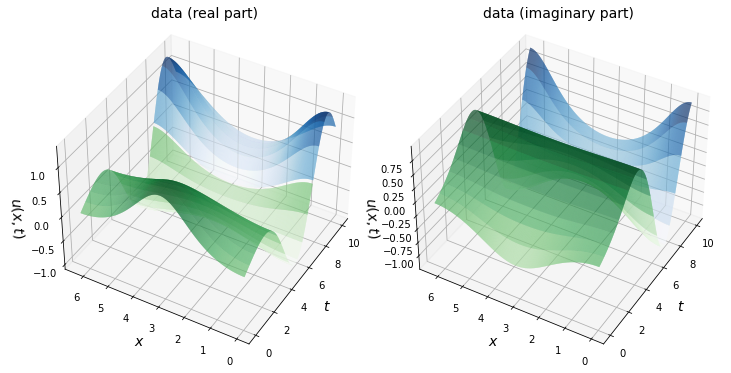

In [36]:
# 3D visualizations
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# create a meshgrid for plotting
# train
M  = X_train.shape[0]
N  = X_train.shape[1]
Δx = 2 * np.pi / M # change in x
x  = np.arange( M ) * Δx
Δt = 0.05 # change in t
xdata = x
tdata = np.arange( 0, N ) * Δt
[ Tdata_train, Xdata_train ] = np.meshgrid( tdata, xdata )
# test
M  = X_test.shape[0]
N  = X_test.shape[1]
Δx = 2 * np.pi / M # change in x
x  = np.arange( M ) * Δx
Δt = 0.05 # change in t
xdata = x
tdata = (np.arange( 0, N ) + X_train.shape[1]) * Δt
[ Tdata_test, Xdata_test ] = np.meshgrid( tdata, xdata )

# plot the solution as a surface

ax1.plot_surface( Tdata_train, Xdata_train, np.real(X_train), rstride=1, cstride=10, cmap = 'Greens' )
ax1.plot_surface( Tdata_test, Xdata_test, np.real(X_test), rstride=1, cstride=10, cmap = 'Blues' )
ax1.view_init( 40, 210 )
ax1.set_xlabel( r'$t$', fontsize = 14 )
ax1.set_ylabel( r'$x$', fontsize = 14 )
ax1.set_zlabel( r'$u(x,t)$', fontsize = 14)
ax1.set_title( 'data (real part)', fontsize = 14 )

ax2.plot_surface( Tdata_train, Xdata_train, np.imag(X_train), rstride=1, cstride=10, cmap = 'Greens' )
ax2.plot_surface( Tdata_test, Xdata_test, np.imag(X_test), rstride=1, cstride=10, cmap = 'Blues' )
ax2.view_init( 40, 210 )
ax2.set_xlabel( r'$t$', fontsize = 14 )
ax2.set_ylabel( r'$x$', fontsize = 14 )
ax2.set_zlabel( r'$u(x,t)$', fontsize = 14)
ax2.set_title( 'data (imaginary part)', fontsize = 14 )

plt.tight_layout()
plt.savefig('data-train-test.png')
plt.show()

### 4. The DMD Algorithm.

**Step 1:** Compute the Singular Value Decomposition (SVD) of $X_1$.
$$
X_{1} = U \Sigma V^{*}
$$
where $*$ denotes the conjugate transpose, $U\in\mathbb{C}^{M \times r}$, $\Sigma\in\mathbb{C}^{r \times r}$, and $V\in\mathbb{C}^{k \times r}$.

The term $r$ is the reduced SVD approximation of $X_1$. The columns of $U$ and $V$ are orthonormal such that $U^{*}U=I$ and $V^{*}V=I$ respectively.

In [37]:
U, Sigma, VH = np.linalg.svd(X1) # full rank r = k-1

We can specify the reduced rank $r$ by looking at the explained variance ratio,
$$
E_{i} = \frac{\sigma^2_{i}}{\sum_{j=0}^{k} \sigma^2_{j}}
$$
where $\sigma_{i}$ is the eigenvalues (also the diagonal entries of $\Sigma$). The cumulative variance ratio is then given by
$$
C_{i} = \sum_{j=0}^{i} E_{i}
$$

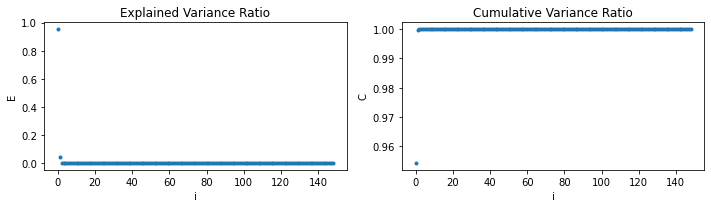

In [38]:
# compute explained variance ratio and cumulative sum
E = Sigma ** 2 / np.sum(Sigma ** 2)
C = np.cumsum(E)

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(E,'.')
ax1.set_xlabel('i')
ax1.set_ylabel('E')
ax1.set_title('Explained Variance Ratio')
ax2.plot(C,'.')
ax2.set_xlabel('i')
ax2.set_ylabel('C')
ax2.set_title('Cumulative Variance Ratio')

plt.tight_layout()
plt.savefig('evr-cvr.png')
plt.show()

In [39]:
# Defining r with at least 99.99% variance explained
p = 0.9999
r = 0 # initial rank
for i in C:
    if i <= p:
        r += 1
    else:
        r = r
print(r)

2


In [40]:
# Given r = 2, we can get the reduce SVD.
U_r = U[:,:r]
Sigma_r = Sigma[:r]
VH_r = VH[:r,:]

**Step 2:** We can compute the matrix $\mathbf{A}$ using the pseudoinverse of $X_{1}$ via its reduced SVD.
$$
\mathbf{A} = X_{2} V \Sigma^{-1} U^{*}
$$

In [41]:
A = X2 @ VH_r.conj().T @ np.diag(1/Sigma_r) @ U_r.conj().T
print(A.shape)

(1000, 1000)


Notice that the resulting matrix $\mathbf{A}$ is a $1000\times1000$ matrix ($1000000$ entries). The size of the matrix depends on the spatial component of the system (number of rows).

It is computationally practical to compute the low rank approximation of $\mathbf{A}$ which is defined as
$$
\tilde{\mathbf{A}} = U^{*} \mathbf{A} U = U^{*} X_{2} V \Sigma^{-1}
$$
where $\tilde{\mathbf{A}}$ is an $r \times r$ matrix.

In [11]:
A_tilde = U_r.conj().T @ X2 @ VH_r.conj().T @ np.diag(1/Sigma_r)
print(A_tilde.shape)

(2, 2)


**Step 3:** Compute the eigendecomposition of $\tilde{\mathbf{A}}$:
$$
\tilde{\mathbf{A}} W = W \Lambda
$$
where the diagonal matrix $\Lambda$ is the eigenvalues $\lambda_{k}$ corresponding to the eigenvector columns of $W$.

In [12]:
Lambda, W = np.linalg.eig(A_tilde)

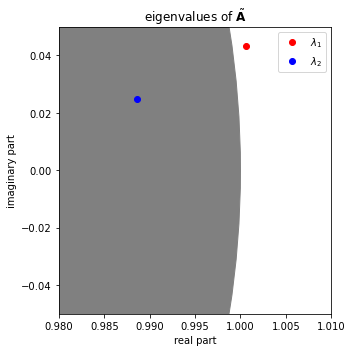

In [13]:
# eigenvalues of A_tilde
fig, ax = plt.subplots(figsize=(5,5))
circle = plt.Circle((0,0),1,color='gray')
ax.add_artist(circle)
ax.plot(np.real(Lambda)[0],np.imag(Lambda)[0],'.',markersize=12,color='red',label=r'$\lambda_{1}$')
ax.plot(np.real(Lambda)[1],np.imag(Lambda)[1],'.',markersize=12,color='blue',label=r'$\lambda_{2}$')
ax.set_xlabel('real part')
ax.set_ylabel('imaginary part')
ax.set_title('eigenvalues of '+r'$\tilde{\mathbf{A}}$')
ax.set_xlim(0.980,1.01)
ax.set_ylim(-0.05,0.05)
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('eigenvalues-of-A-tilde.png')
plt.show()

# the eigenvalues of A_tilde are complex and one of them has modulus greater than 1.
# The complex eigenvalues tell us that the system have cyclic behaviors.

**Step 4:** Going back to the full rank matrix $\mathbf{A}$. The eigendecomposition of $\mathbf{A}$ is given by
$$
\mathbf{A} \Phi = \Phi \Omega
$$
where $\Omega$ is the eigenvalues $\omega_{k}$ corresponding to the eigenvector columns of $\Phi$. However, since $\mathbf{A}$ is a large matrix computing the eigendecomposition is expensive.

Since $\tilde{\mathbf{A}}$ is constructed via the low rank approximation in the eigenspace of $\mathbf{A}$, then we can reconstruct the eigendecomposition of $\mathbf{A}$ using the eigendecomposition of $\tilde{\mathbf{A}}$. Given $W$, the approximated eigenvalues of $\mathbf{A}$ is given by
$$
\Phi = X_2 V \Sigma^{-1} W
$$
and the eigenvalues of $\mathbf{A}$ is given by $\Lambda$.

$\Phi$ is also known as the DMD modes.

In [14]:
# compute the Φ matrix
Phi = X2 @ VH_r.conj().T @ np.diag( 1 / Sigma_r ) @ W

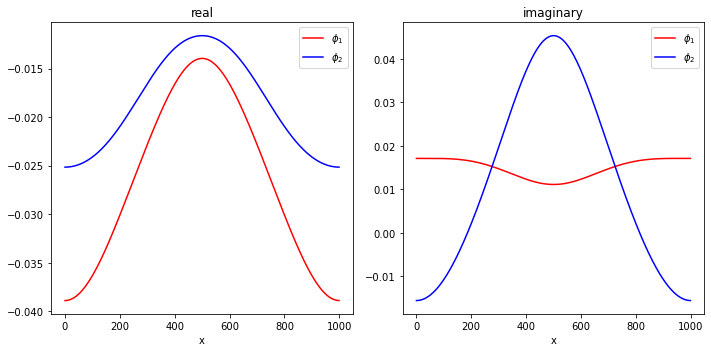

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(np.real(Phi)[:,0],label=r'$\phi_{1}$',color='red')
ax[0].plot(np.real(Phi)[:,1],label=r'$\phi_{2}$',color='blue')
ax[0].set_xlabel('x')
ax[0].set_title('real')
ax[0].legend(loc=0)
ax[1].plot(np.imag(Phi)[:,0],label=r'$\phi_{1}$',color='red')
ax[1].plot(np.imag(Phi)[:,1],label=r'$\phi_{2}$',color='blue')
ax[1].set_xlabel('x')
ax[1].set_title('imaginary')
ax[1].legend(loc=0)

plt.tight_layout()
plt.savefig('eigenvectors-of-A-tilde.png')
plt.show()

### 5. DMD Reconstructions and Predictions.

Given the low rank approximation of $\Phi$, we can reconstruct the original data and approximate a solution at all future times.

First, we compute the continuous time frequencies:
$$
\omega_{i} = \frac{\ln{(\lambda_{i})}}{\Delta t}
$$
where $\lambda_{i}$ is the nonzero eigenvalues of $\tilde{\mathbf{A}}$.

In [16]:
# compute the continuous time frequencies (add 0*1j to ensure it is treated as a complex number)
omega = np.log( Lambda + 1j * 0 ) / Δt

This approximates the solution at all future times given by
$$
\mathbf{x}(t) \approx \Phi e^{\Omega t}\mathbf{b}
$$
where $\Omega$ is a diagnoal matrix with entried $\omega_{i}$.

Next, we compute the initial coefficient values $b_i$ in the vector $\mathbf{b}$:
$$
\mathbf{b} = \Phi^{\dagger} \mathbf{x}_1
$$
where $\mathbf{b}$ is the solution of the linear matrix equation $\mathbf{x}_1 = \Phi \mathbf{b}$.

In [17]:
# compute the DMD mode amplitudes b
b, residuals, rank, s = np.linalg.lstsq( Phi, X1[:,0], rcond = None )

Now, we can reconstruct the original data by computing the temporal component $e^{\Omega t}$.

In [18]:
# compute time dynamics
mm1 = X.shape[1]
time_dynamics = np.zeros((r,mm1),dtype=float)+1j*0
t = np.array(range(1,mm1+1),dtype=float)*Δt
for i in range(0,mm1):
    time_dynamics[:,i] = b * np.exp(omega * t[i])
    
# reconstruct training data
DMD_recon = Phi @ time_dynamics
X_DMD = np.zeros(X.shape,dtype=float)+1j*0
X_DMD[:,0] = X[:,0]
X_DMD[:,1:] = DMD_recon[:,:DMD_recon.shape[1]-1]

In [19]:
print(X.shape)
print(X_DMD.shape)

(1000, 200)
(1000, 200)


### 6. DMD Visualizations.

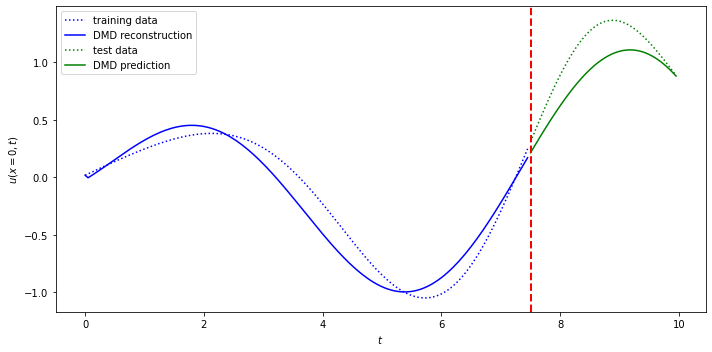

In [20]:
# visualizing one time-series
M  = X.shape[0]
N  = X.shape[1]
Δx = 2 * np.pi / M # change in x
x  = np.arange( M ) * Δx
Δt = 0.05 # change in t
xdata = x
tdata = np.arange( 0, N ) * Δt

sample_index = 0
plt.figure(figsize=(10,5))
plt.plot(tdata[:sep],np.real(X[sample_index,:sep]),':',color='blue',label='training data')
plt.plot(tdata[:sep],np.real(X_DMD[sample_index,:sep]),'-',color='blue',label='DMD reconstruction')
plt.plot(tdata[sep:],np.real(X[sample_index,sep:]),':',color='green',label='test data')
plt.plot(tdata[sep:],np.real(X_DMD[sample_index,sep:]),'-',color='green',label='DMD prediction')
plt.axvline(tdata[sep],linestyle='--',linewidth=2,color='red')
plt.xlabel(r'$t$')
plt.ylabel(r'$u(x=0,t)$')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('x=0-data-reconstruction-dmd.png')
plt.show()

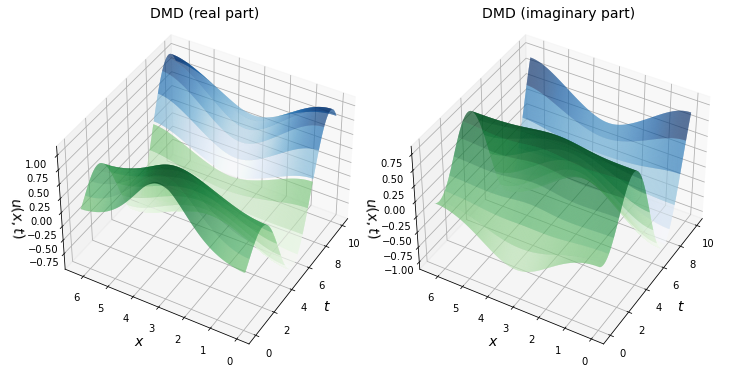

In [21]:
X_DMD_train = X_DMD[:,:sep]
X_DMD_test = X_DMD[:,sep:]

# 3D visualizations
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# create a meshgrid for plotting
# train
M  = X_DMD_train.shape[0]
N  = X_DMD_train.shape[1]
Δx = 2 * np.pi / M # change in x
x  = np.arange( M ) * Δx
Δt = 0.05 # change in t
xdata = x
tdata = np.arange( 0, N ) * Δt
[ Tdata_train, Xdata_train ] = np.meshgrid( tdata, xdata )
# test
M  = X_DMD_test.shape[0]
N  = X_DMD_test.shape[1]
Δx = 2 * np.pi / M # change in x
x  = np.arange( M ) * Δx
Δt = 0.05 # change in t
xdata = x
tdata = (np.arange( 0, N ) + X_DMD_train.shape[1]) * Δt
[ Tdata_test, Xdata_test ] = np.meshgrid( tdata, xdata )

# plot the solution as a surface

ax1.plot_surface( Tdata_train, Xdata_train, np.real(X_DMD_train), rstride=1, cstride=10, cmap = 'Greens' )
ax1.plot_surface( Tdata_test, Xdata_test, np.real(X_DMD_test), rstride=1, cstride=10, cmap = 'Blues' )
ax1.view_init( 40, 210 )
ax1.set_xlabel( r'$t$', fontsize = 14 )
ax1.set_ylabel( r'$x$', fontsize = 14 )
ax1.set_zlabel( r'$u(x,t)$', fontsize = 14)
ax1.set_title( 'DMD (real part)', fontsize = 14 )

ax2.plot_surface( Tdata_train, Xdata_train, np.imag(X_DMD_train), rstride=1, cstride=10, cmap = 'Greens' )
ax2.plot_surface( Tdata_test, Xdata_test, np.imag(X_DMD_test), rstride=1, cstride=10, cmap = 'Blues' )
ax2.view_init( 40, 210 )
ax2.set_xlabel( r'$t$', fontsize = 14 )
ax2.set_ylabel( r'$x$', fontsize = 14 )
ax2.set_zlabel( r'$u(x,t)$', fontsize = 14)
ax2.set_title( 'DMD (imaginary part)', fontsize = 14 )

plt.tight_layout()
plt.savefig('reconstruction-train-test.png')
plt.show()

### 7. DMD Video Simulation.

In [22]:
from matplotlib import animation
from IPython.display import HTML

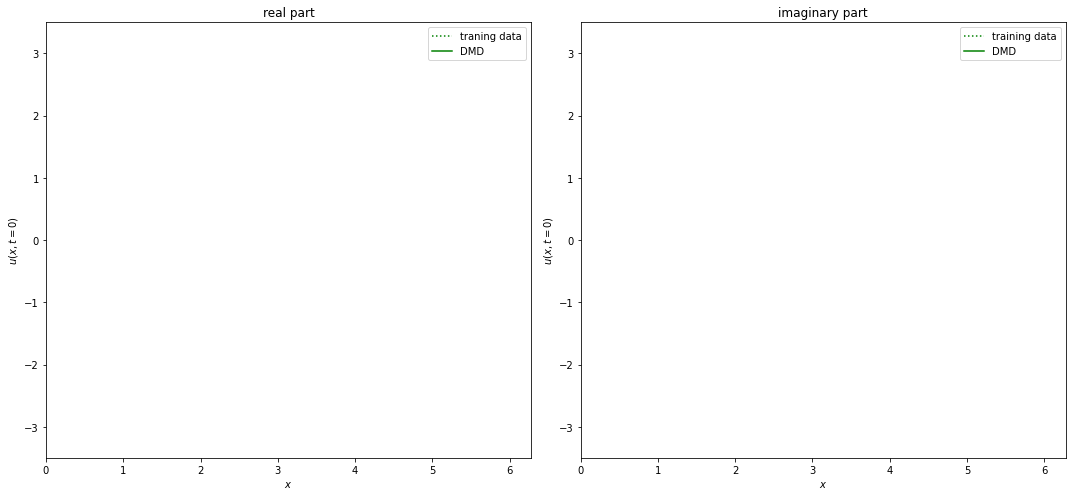

In [23]:
# real data and DMD video
M  = X.shape[0]
N  = X.shape[1]
Δx = 2 * np.pi / M # change in x
x  = np.arange( M ) * Δx
Δt = 0.05 # change in t
xdata = x
tdata = np.arange( 0, N ) * Δt

fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_xlim(xdata[0],xdata[xdata.shape[0]-1])
ax[0].set_ylim(-3.50,3.50)
line_data_real, = ax[0].plot([],[],linestyle=':',label='traning data',color='green')
line_DMD_real, = ax[0].plot([],[],linestyle='-',label='DMD',color='green')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$u(x,t=$'+str(0)+')')
ax[0].set_title('real part')
ax[0].legend(loc=1)
ax[1].set_xlim(xdata[0],xdata[xdata.shape[0]-1])
ax[1].set_ylim(-3.50,3.50)
line_data_imag, = ax[1].plot([],[],linestyle=':',label='training data',color='green')
line_DMD_imag, = ax[1].plot([],[],linestyle='-',label='DMD',color='green')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$u(x,t=$'+str(0)+')')
ax[1].set_title('imaginary part')
ax[1].legend(loc=1)
plt.tight_layout()

def init():
    line_data_real.set_data([],[])
    line_DMD_real.set_data([],[])
    line_data_imag.set_data([],[])
    line_DMD_imag.set_data([],[])
    ax[0].set_ylabel(r'$u(x,t=$'+str(0)+')')
    return (line_data_real,)

def animate(i):
    line_data_real.set_data(xdata,np.real(X)[:,i])
    line_DMD_real.set_data(xdata,np.real(X_DMD)[:,i])
    line_data_imag.set_data(xdata,np.imag(X)[:,i])
    line_DMD_imag.set_data(xdata,np.imag(X_DMD)[:,i])
    if i == sep:
        line_data_real.set_color('blue')
        line_data_real.set_label('test data')
        line_DMD_real.set_color('blue')
        line_data_imag.set_color('blue')
        line_data_imag.set_label('test data')
        line_DMD_imag.set_color('blue')
        
        ax[0].legend(loc=1)
        ax[1].legend(loc=1)
        
    ax[0].set_ylabel(r'$u(x,t=$'+str(np.round(tdata[i],1))+')')
    ax[1].set_ylabel(r'$u(x,t=$'+str(np.round(tdata[i],1))+')')
    return (line_data_real,)

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=X.shape[1],
                               interval=80,blit=True)


In [24]:
HTML(anim.to_html5_video())

In [25]:
# DMD and beyond video
# compute time dynamics
mm1 = 1000
time_dynamics = np.zeros((r,mm1),dtype=float)+1j*0
t = np.array(range(1,mm1+1),dtype=float)*Δt
for i in range(0,mm1):
    time_dynamics[:,i] = b * np.exp(omega * t[i])
    
# reconstruct training data
DMD_recon = Phi @ time_dynamics
X_DMD_beyond = np.zeros((X.shape[0],mm1),dtype=float)+1j*0
X_DMD_beyond[:,0] = X[:,0]
X_DMD_beyond[:,1:] = DMD_recon[:,:DMD_recon.shape[1]-1]
print(X_DMD_beyond.shape)

(1000, 1000)


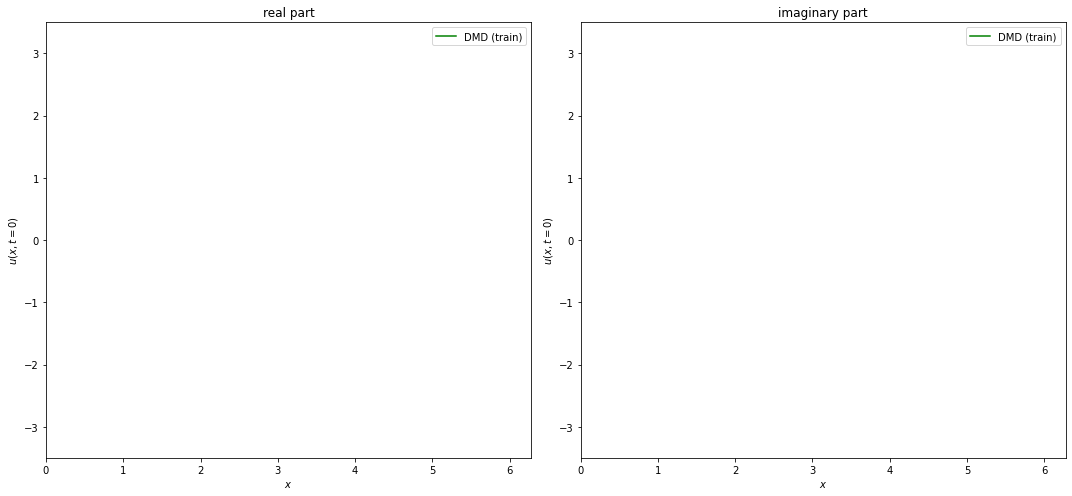

In [26]:
M  = X_DMD_beyond.shape[0]
N  = X_DMD_beyond.shape[1]
Δx = 2 * np.pi / M # change in x
x  = np.arange( M ) * Δx
Δt = 0.05 # change in t
xdata = x
tdata = np.arange( 0, N ) * Δt

fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_xlim(xdata[0],xdata[xdata.shape[0]-1])
ax[0].set_ylim(-3.50,3.50)
line_DMD_beyond_real, = ax[0].plot([],[],linestyle='-',label='DMD (train)',color='green')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$u(x,t=$'+str(0)+')')
ax[0].set_title('real part')
ax[0].legend(loc=1)
ax[1].set_xlim(xdata[0],xdata[xdata.shape[0]-1])
ax[1].set_ylim(-3.50,3.50)
line_DMD_beyond_imag, = ax[1].plot([],[],linestyle='-',label='DMD (train)',color='green')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$u(x,t=$'+str(0)+')')
ax[1].set_title('imaginary part')
ax[1].legend(loc=1)
plt.tight_layout()

def init():
    line_DMD_beyond_real.set_data([],[])
    line_DMD_beyond_imag.set_data([],[])
    ax[0].set_ylabel(r'$u(x,t=$'+str(0)+')')
    return (line_data_real,)

def animate(i):
    line_DMD_beyond_real.set_data(xdata,np.real(X_DMD_beyond)[:,i])
    line_DMD_beyond_imag.set_data(xdata,np.imag(X_DMD_beyond)[:,i])
    if i == sep:
        line_DMD_beyond_real.set_color('blue')
        line_DMD_beyond_real.set_label('DMD (test)')
        line_DMD_beyond_imag.set_color('blue')
        line_DMD_beyond_imag.set_label('DMD (test)')
        ax[0].legend(loc=1)
        ax[1].legend(loc=1)
    elif i == X.shape[1]:
        line_DMD_beyond_real.set_color('red')
        line_DMD_beyond_real.set_label('DMD (beyond)')
        line_DMD_beyond_imag.set_color('red')
        line_DMD_beyond_imag.set_label('DMD (beyond)')
        ax[0].legend(loc=1)
        ax[1].legend(loc=1)
        
    ax[0].set_ylabel(r'$u(x,t=$'+str(np.round(tdata[i],1))+')')
    ax[1].set_ylabel(r'$u(x,t=$'+str(np.round(tdata[i],1))+')')
    return (line_data_real,)

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=X_DMD_beyond.shape[1],
                               interval=40,blit=False)


In [27]:
HTML(anim.to_html5_video())

### References

[1] Kutz, J. N., Brunton, S. L., Brunton, B. W., & Proctor, J. L. (2016). Dynamic mode decomposition: data-driven modeling of complex systems. Society for Industrial and Applied Mathematics.